# **Homework 1**

In this Homework, people who collaborated on all excercises are:


*   Danilo Guglielmi (s318083)
*   Maria Francesca Merangolo (s318905)
*   Gabriele Martina (s310789)

**Exercise 1.**

In the following code, we define a directed graph $G = (V, E)$ which represents a flow network. The graph has $V$ nodes, $o$, $a$, $b$, $c$, $d$, and $E$ edges, each with a specific capacity. The nodes are positioned using coordinates from the `pos` dictionary. Subsequently, we show the graph, providing a representation of the nodes, edges, and their respective capacities.

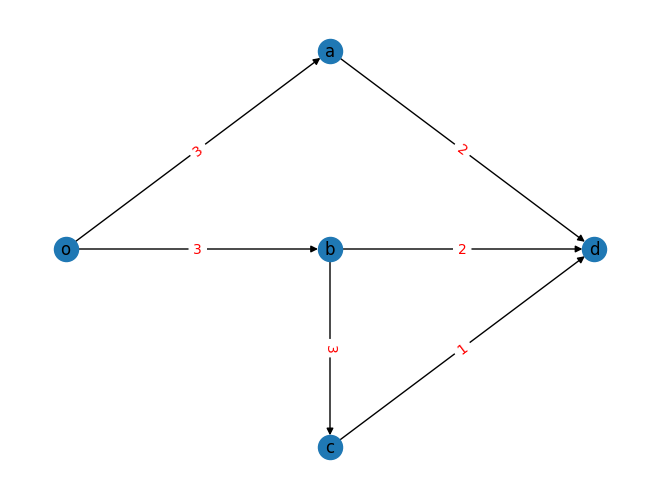

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Graph definition and capacities
G = nx.DiGraph()
G.add_edge('o', 'a', capacity=3)
G.add_edge('o', 'b', capacity=3)
G.add_edge('a', 'd', capacity=2)
G.add_edge('b', 'd', capacity=2)
G.add_edge('b', 'c', capacity=3)
G.add_edge('c', 'd', capacity=1)

# Draw nodes with labels
pos = {'o': (0, 0), 'b': (1, 0), 'c': (1, -1), 'd': (2, 0), 'a': (1, 1)}
nx.draw(G, pos, with_labels=True)

# Draw edge labels (capacities)
edge_labels = {(u, v): str(G[u][v]['capacity']) for u, v in G.edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.show()


**(a) What is the minimum aggregate capacity that needs to be removed for no feasible flow from $o$ to $d$ to exist?**

We know the flows from a source $o$ to a destination $d$ is a distribution such that:
- for every non-terminal node the incoming flow equals the outcoming flow (mass conservation);
- the outcoming flow from $o$ equals the incoming flow to $d$ and this quantity is called **throughput**.


For this problem we have to recall the definition of a cut in a network: a partition of the nodes into two set $\{U,U^C\}$, such that $o \in U$ and $d \in U_C$.

The capacity of a cut $\{U,U^C\}$ is defined as: $$C_{U} = \sum_{i \in U}\sum_{j \in U^C} c(i,j)$$

So, we have to search the minimum cut of a graph that minimizes the sum of the capacities of the edges crossing the cut. Since the bottleneck of the flow is the min-cut of the network, the minimum aggregate capacity that needs to be removed equals the capacity of the min-cut of the network. If this quantity is removed, it disconnects $o$ from $d$ and eliminates the possibility of a feasible flow from the source to the destination.

We calculate this using the `networkx.algorithms.flow.minimum_cut` function from the NetworkX library, which returns 2 values: the first one indicates the total capacity of the edges in the minimum cut; the second one is a tuple containing the 2 partitions of nodes $\{U,U^C\}$.

In [ ]:
# Find the minimum cut separating "o" from "d"
min_cut_capacity, min_cut = nx.algorithms.flow.minimum_cut(G,'o','d')

print("The minimum aggregate capacity that needs to be removed is:", min_cut_capacity)

The minimum aggregate capacity that needs to be removed is: 5


**(b) What is the maximum aggregate capacity that can be removed from the links without affecting the maximum throughput from $o$ to $d$?**

We start by calculating the original maximum flow value from node $o$ to node $d$ using the `network.algorithms.flow.maximum_flow_value` function from the NetworkX library that returns the maximum throughput. If we need more information, we can call the `network.algorithms.flow.maximum_flow` that returns also a dictionary containing the value of the flow that goes through each edge. Both these functions are 2 alternatives of "Ford-Fulkerson Algorithm", which could have a slow convergence. Furthermore, we can notice that the `maximum_flow_value` is equal to `min_cut_capacity` computed at point $(a)$: this is guaranteed by "Max Flow Min Cut Theorem".

Then, the code simulates the removal of each edge from the network, temporarily setting the capacity of the edge to 0 and recalculating the maximum flow. If the maximum flow remains the same, this means that the removal of this edge does not affect the maximum flow. The difference between the original maximum flow and the new maximum flow represents the capacity that can be effectively removed without affecting the throughput.

In [ ]:
# Calculate the original maximum flow
max_flow_value = nx.algorithms.flow.maximum_flow_value(G, 'o', 'd')

# Initialize the variable to store the maximum capacity removed
max_capacity_removed = 0

# Iterate over the edges to temporarily remove the capacity
for edge in G.edges():
    u, v = edge

    # Save the original capacity of the edge
    original_capacity = G[u][v]['capacity']

    # Temporarily remove the capacity
    G[u][v]['capacity'] = 0

    # Calculate the new maximum flow
    new_max_flow = nx.algorithms.flow.maximum_flow_value(G, 'o', 'd')

    # Restore the original capacity
    G[u][v]['capacity'] = original_capacity

    # Update the maximum capacity removed if necessary
    capacity_removed = max_flow_value - new_max_flow
    max_capacity_removed = max(max_capacity_removed, capacity_removed)

print("Max flow from o to d:", max_flow_value)

print("\nThe maximum aggregate capacity that can be removed without affecting the maximum throughput:", max_capacity_removed,"\n")


Max flow from o to d: 5

The maximum aggregate capacity that can be removed without affecting the maximum throughput: 3 



**(c) You are given $x > 0$ extra units of capacity ($x \in Z$). How should you distribute them in order to maximize the throughput that can be sent from $o$ to $d$? Plot the maximum throughput from $o$ to $d$ as a function of $x \geq 0$.**

In this exercise we have to find the optimal way to distribute extra capacity in the network to maximize the throughput.

To maximize the throughput, we have to localize the "bootlenecks" of the network: nodes that have the inflow greater than the outflow. So, we add the extra capacity in the edges of the minimum cut, allowing more flow to pass from the source to the destination.

Initially, we establish a range for the maximum extra capacity and iterate over this. For each value in the range we find the minimum cut and identify the edges belonging to the cut. We store them in the empty array `cutset`. If there are edges in the cutset, we select the first edge and increase its capacity by 1. Subsequently, we compute the maximum throughput (maximum flow) after updating the capacity using the `maximum_flow_value` and append this value to array `throughputs`.
After the loop, we plot the maximum throughput as a function of the extra capacity using the `matplotlib` library in Python.

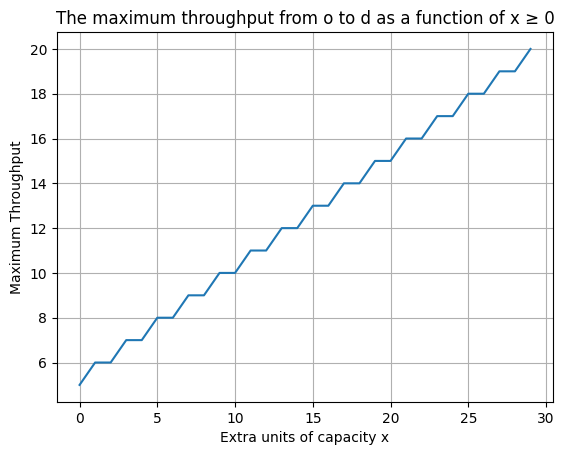


Extra units of capacity x: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

Throughput: [5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20]


In [ ]:
# Initialize array to store extra capacity and corresponding throughputs
capacity_x = []
throughputs = []

# Set the range for maximum extra capacity
extra_capacity_range = range(0,30)

# Iterate until x reaches the maximum extra capacity
for x in extra_capacity_range:
    # Find the minimum cut in the graph between 'o' and 'd'
    min_cut_capacity, min_cut = nx.algorithms.flow.minimum_cut(G,'o','d')

    # Split the nodes into reachable and non-reachable sets based on the minimum cut
    reachable, not_reachable = min_cut

    # Identify the edges belonging to the cut (cutset)
    cutset = [] # Initialize an empty array to contain the edges of the minimum cut

    # Iterate over reachable nodes
    for u in reachable:
        for v in G[u]:
            # G[u] returns a dictionary of neighbors for node n.
            if v in not_reachable:
                # Add the edges between the current node and non-reachable nodes to the cutset
                cutset.append((u, v))

    # If there are edges in the cutset
    if len(cutset) > 0:
        first_edge = cutset[0]  # Select the first edge from the cutset
        G[first_edge[0]][first_edge[1]]['capacity'] += 1  # Increase the capacity of the selected edge by 1
        # first_edge[0] is the starting node of the edge.
        # first_edge[1] is the destination node of the edge.

    capacity_x.append(x)

    # Compute maximum throughput after updating the capacity
    max_flow_value = nx.maximum_flow_value(G, 'o', 'd')

    # Append the maximum flow value to the list of throughputs
    throughputs.append(max_flow_value)

# Plot the values to visualize how the maximum throughput changes with added extra capacity
plt.plot(capacity_x, throughputs)
plt.xlabel("Extra units of capacity x")
plt.ylabel("Maximum Throughput")
plt.title("The maximum throughput from o to d as a function of x ≥ 0")
plt.grid(True)
plt.show()

print("\nExtra units of capacity x:", capacity_x)
print("\nThroughput:", throughputs)

**Exercise 2.**

There is a set of people $\{p_1, p_2, p_3, p_4\}$ and a set of books $\{b_1, b_2, b_3, b_4\}$. Each person is interested in a subset of books, specifically
$p_1 \rightarrow \{b_1, b_2\}$, $p_2 \rightarrow \{b_2, b_3\}$, $p_3 \rightarrow \{b_1, b_4\}$, $p_4 \rightarrow \{b_1, b_2, b_4\}$.




**(a) Exploit max-flow problems to find a perfect matching (if any).**

We can represent the situation by a simple bipartite network, where $V_0$ is the set of people and $V_1$ is the set of books, and an edge $(n_0,n_1)$ (with $n_0 \in V_0$, $n_1 \in V_1$) exists if the person $n_0$ is interested in the book $n_1$.

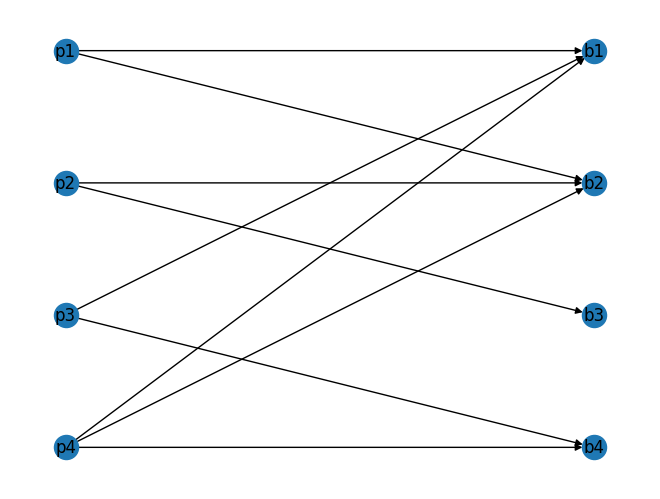

In [ ]:
import networkx as nx
import collections

G = nx.DiGraph()
G.add_edges_from([('p1','b1'), ('p1','b2'), ('p2','b2'), ('p2','b3'), ('p3', 'b1'), ('p3','b4'), ('p4','b1'), ('p4','b2'), ('p4', 'b4')])
pos = {'p1':[0,2], 'p2':[0,1], 'p3':[0,0], 'p4':[0,-1], 'b1':[1,2], 'b2':[1,1], 'b3':[1,0], 'b4':[1,-1]}

nx.draw(G,pos,with_labels=True)

Given the bipartite graph $G=(V,E)$, we can build the directed capacitated graph $G1$, with node set $V \cup s \cup d$, and edge set constructed as follows:
- for every node $n \in V_0$, add an edge (s,n), with capacity 1;
- for every node $n \in V_1$, add an edge (n,d), with capacity 1;
- for every undirected edge $(i,j)$ in $G$, add a directed edge $(i,j)$ in $G1$ with capacity 1.

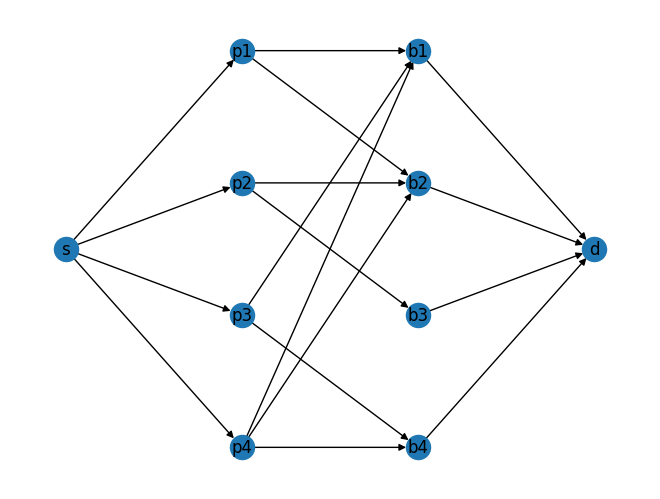

In [ ]:
# Let's create a copy of G in which we add a source and a destination
G1 = G.copy()
G1.add_edges_from([('s','p1'), ('s','p2'), ('s','p3'), ('s','p4'), ('b1','d'), ('b2','d'), ('b3','d'), ('b4','d')])

# Set all the capacities to 1
for u, v in G1.edges:
    G1[u][v]['capacity'] = 1

pos1 = {'p1':[0,2], 'p2':[0,1], 'p3':[0,0], 'p4':[0,-1], 'b1':[1,2], 'b2':[1,1], 'b3':[1,0], 'b4':[1,-1], 's':[-1,0.5], 'd':[2,0.5]}
nx.draw(G1,pos1,with_labels=True)

We know that there is analogy between maximum flows and perfect matching, so a $V_0$-perfect matching on $G$ exists if and only if it there exists a flow with throughput $|V_0|$ on the network $G1$.

In this case, $|V_1|=|V_0|$, where $|V_0|$ is the set of people and $|V_1|$ is the set of books, so a perfect matching could exist. On the other hand, thanks to "Hall's marriage Theorem", we know that if $|V_1|<|V_0|$ (less books than people), a $V_0$-perfect matching cannot exist.

The max flow is: 4 

A perfect matching exists.



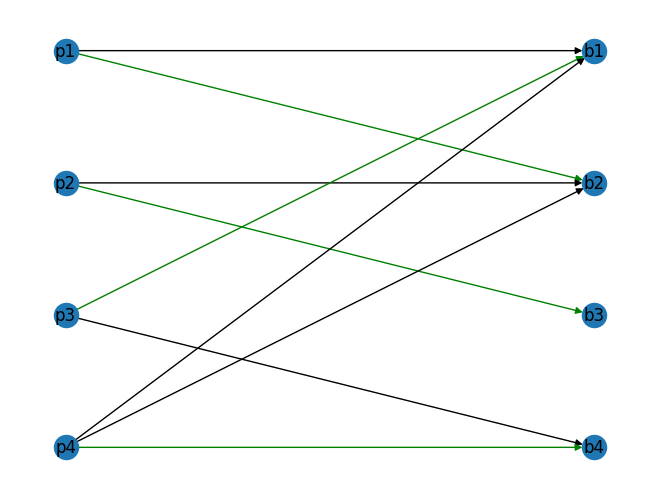

In [ ]:
max_flow_value, max_flow = nx.algorithms.flow.maximum_flow(G1,'s','d')

if max_flow_value == 4: # |V0|
    print("The max flow is:",max_flow_value,"\n")
    print("A perfect matching exists.\n")

    # In "max_flow" there are written the edges that are a combination for a perfect matching
    # Let's take the original graph G, without the added source and destination
    for u,v in G.edges():
        G[u][v]['color']='black'

    G['p1']['b2']['color'] = 'green'
    G['p2']['b3']['color'] = 'green'
    G['p3']['b1']['color'] = 'green'
    G['p4']['b4']['color'] = 'green'
    colors = [G[u][v]['color'] for u,v in G.edges()]

    nx.draw(G,pos,with_labels=True,edge_color=colors)
else:
    print("No perfect matching exists.")

*Edges of the perfect matching are coloured in green.*


**(b) Assume now that there are multiple copies books, and the distribution of the number of copies is (2,3,2,2). Each person can take an arbitrary number of different books. Exploit the analogy with max-flow problems to establish how many books of interest can be assigned in total.**

We are supposing that every person can take only one copy for each book but can take more copies of different books.

To do this, we build a new graph $G_2$ starting from $G_1$ and changing the following features:

*   All the edges that start from the source have infinity capacity;
*   All the inner edges $p_i \rightarrow b_i$ have capacity equal to 1
*   The edges that start from ($b_1,b_2,b_3,b_4$) have capacity equal to (2,3,2,2)



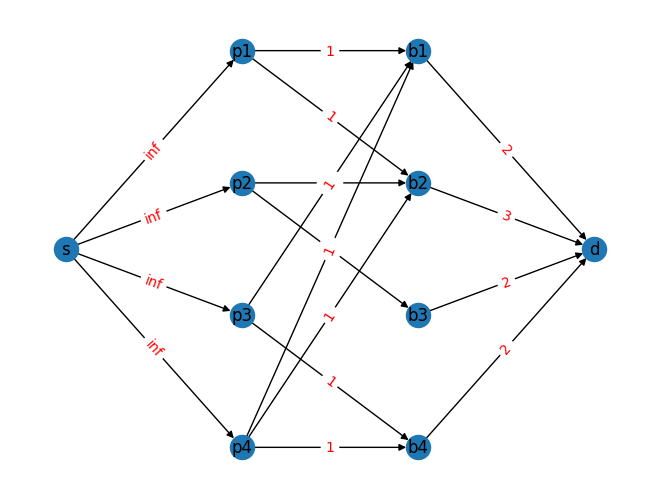


The maximum number of books that can be assigned is 8


In [ ]:
G2 = G1.copy()

# All the edges that start from the source have infinity capacity
# All the inner edges p_i -> b_i have capacity equal to 1
# The edges that start from (b1, b2, b3, b4) have capacity equal to (2,3,2,2)
for u, v in G2.edges:
    if v == 'b1' or v == 'b2' or v == 'b3' or v == 'b4':
        G2[u][v]['capacity'] = 1
    elif u == 's':
        G2[u][v]['capacity'] = float('inf')
    elif v == 'd':
        if u == 'b1' or u == 'b3' or u == 'b4':
            G2[u][v]['capacity'] = 2
        elif u == 'b2':
            G2[u][v]['capacity'] = 3

# Show the auxiliary graph
edge_labels = {(u, v): str(G2[u][v]['capacity']) for u, v in G2.edges}
nx.draw(G2, pos1, with_labels=True)
nx.draw_networkx_edge_labels(G2, pos1, edge_labels=edge_labels, font_color='red')
plt.show()

max_flow_g2 = nx.algorithms.flow.maximum_flow_value(G2,'s','d')
print("\nThe maximum number of books that can be assigned is",max_flow_g2)

The result is what we expected, noticing also that $b_3$ has the inflow (number of interested people) minor than its outflow (number of available copies).

**Remark:** if instead a person can take more copies of different books and also more copies of the same one, the capacities of inner edges $p_i \rightarrow b_i$ of the bipartite graph $G_2$ have to be set with the following values:


*   All the edges with $b_1$ as destination node have capacity equal to 2
*   All the edges with $b_2$ as destination node have capacity equal to 3
*   All the edges with $b_3$ as destination node have capacity equal to 2
*   All the edges with $b_4$ as destination node have capacity equal to 2

In these conditions, the max-flow is equal to 9.


**(c) Suppose that the library can sell a copy of a book and buy a copy of another book. Which books should be sold and bought to maximize the number of assigned books?**

Starting from the idea that the library can buy a book immediately after selling one, we firstly memorized the last maximum flow, than we iterated on nodes of $|V_1|$ changing the capacity of edges that start from $b_i$ and end to the destination $d$. Specifically, we decreased the selected edge and we re-compute the maximum flow. Then, we compared the results to find the best case.

In [ ]:
G3 = G2.copy()
# memorize the max flow
max_flow_g3 = max_flow_g2

for bsold in ['b1','b2','b3','b4']:
    # Sell a book
    G3[bsold]['d']['capacity'] -= 1
    for bbought in ['b1','b2','b3','b4']:
        if bbought == bsold:
            continue
        # Buy a book
        G3[bbought]['d']['capacity'] += 1

        max_flow_temp, dictionary =  nx.algorithms.flow.maximum_flow(G3,'s','d')
        # Restore
        G3[bbought]['d']['capacity'] -= 1

        if max_flow_temp > max_flow_g3:
            max_flow_g3 = max_flow_temp
            bestsold = bsold
            bestbought = bbought
        ## DEBUG
        # print("Flow:",max_flow_temp, "\nSOLD: ",bsold," -- BOUGHT: ",bbought,"\n")
        # print(dictionary)
    # Restore
    G3[bsold]['d']['capacity'] += 1

print("Best max flow:", max_flow_g3)
print("Best sold:", bestsold)
print("Best bought:", bestbought)

Best max flow: 9
Best sold: b3
Best bought: b1


Updating the capacity, the new graph $G_3$ is the following:

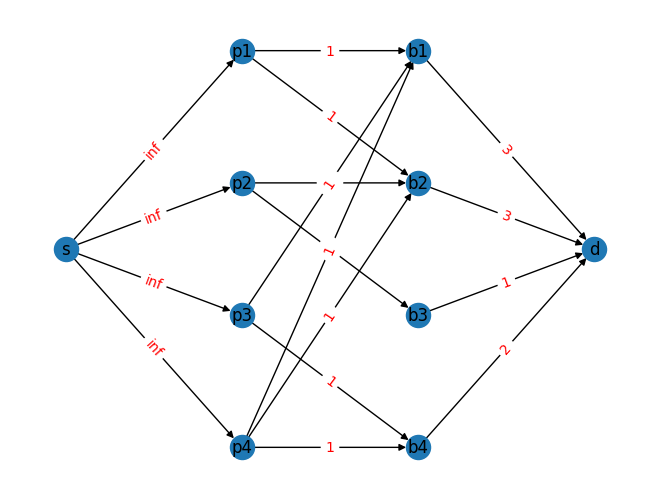

In [ ]:
# Update the capacity of the selected edges
G3[bestsold]['d']['capacity'] -= 1
G3[bestbought]['d']['capacity'] += 1

# Show the new graph
edge_labels = {(u, v): str(G3[u][v]['capacity']) for u, v in G3.edges}
nx.draw(G3, pos1, with_labels=True)
nx.draw_networkx_edge_labels(G3, pos1, edge_labels=edge_labels, font_color='red')
plt.show()

**Exercise 3.**

In this excercise, we work on the graph of the approximated highway network in Los Angeles. We have the information about the flow, capacity, traffic and travel time in $f$, $C$, $B$ and $l$.

In [ ]:
import scipy.io
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

B = scipy.io.loadmat('traffic.mat')["traffic"]
l = scipy.io.loadmat('traveltime.mat')["traveltime"].reshape(28,)
C = scipy.io.loadmat('capacities.mat')["capacities"].reshape(28,)
f = scipy.io.loadmat('flow.mat')["flow"].reshape(28,)

First of all, we have to build the directed graph $G$ and its structure is suggested by the matrix $B$. The rows of $B$ represent the nodes of the network, while the columns are associated with the links. In particular, the $i$-th column of $B$ associated with the $e_i$ edge has -1 in the row corresponding to the the head node, 1 for the tail node. Knowing this, we have to iterate on $B$ columns and to memorize on which rows there are written -1 and 1.

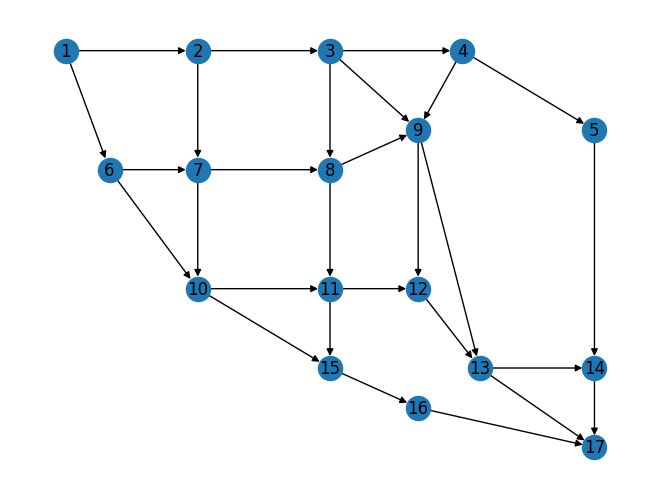

In [ ]:
G = nx.DiGraph()

num_nodes, num_links = B.shape

# let's iterate on B reading the rows of each column
for j in range(num_links):
    for i in range(num_nodes):
      # memorize head and tail nodes of each link
        if B[i, j] == 1:
            start = i+1 # +1 because we start from node 1 in the graph
        elif B[i, j] == -1:
            end = i+1
    # Add the node and the link with its corresponding ttime e capacity
    G.add_edge(start,end, travel_time = l[j], capacity = C[j])

pos = {1: (0, 0), 2: (1.5, 0), 3: (3, 0), 4: (4.5, 0), 5: (6, -1),
      6: (0.5, -1.5), 7: (1.5, -1.5), 8: (3, -1.5), 9: (4, -1), 10: (1.5, -3),
      11: (3, -3), 12: (4, -3), 13: (4.7, -4), 14: (6, -4), 15: (3, -4),
      16: (4, -4.5), 17: (6, -5)}
nx.draw(G, pos, with_labels=True)


**(a) Find the shortest path between node 1 and 17. This is equivalent to the fastest path (path with shortest traveling time) in an empty network.**

The first objective of Exercise 3 is to find the shortest path, that is equivalent to find the fastest path in an empty network. With the goal of doing this, we launch the NetworkX function `nx.shortest_path` that returns the sequence of nodes that guarantee the shortest path between the selected nodes.

After determining the path, that you can see coloured in red in the figure, the total travel time is computed summing the singular travel time of each node.


Shortest path between node 1 and node 17: [1, 2, 3, 9, 13, 17]

Total travel time: 0.532996 



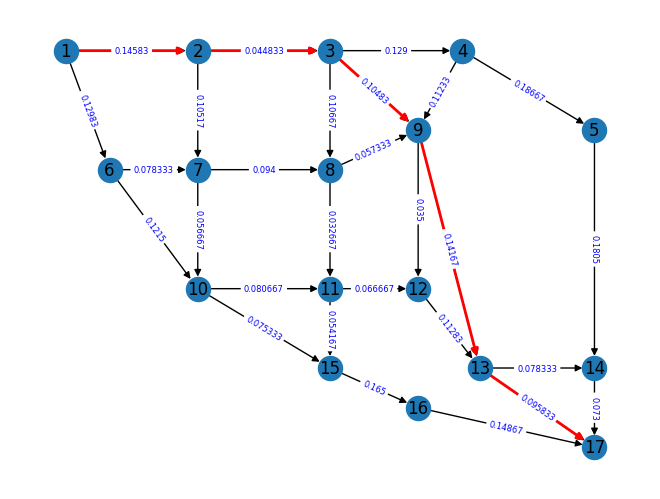

In [ ]:
# Compute the shortest path between node 1 and node 17
shortest_path = nx.shortest_path(G, source=1, target=17, weight='travel_time')

# Draw the shortest path
nx.draw(G, pos, with_labels=True)
shortest_path_edges = [(shortest_path[i], shortest_path[i + 1]) for i in range(len(shortest_path) - 1)]
nx.draw_networkx_edges(G, pos, edgelist=shortest_path_edges, edge_color='red', width=2)

# Draw ttime labels on edges
travel_labels = {(u, v): G[u][v]['travel_time'] for u, v in G.edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=travel_labels, font_color='blue', font_size=6)

print("\nShortest path between node 1 and node 17:", shortest_path)

# Compute the total ttime
tot_ttime=0
for i in range(0,len(shortest_path)-1):
    tot_ttime += G[shortest_path[i]][shortest_path[i+1]]['travel_time']

print("\nTotal travel time:", tot_ttime,"\n")

plt.show()

**(b) Find the maximum flow between node 1 and 17.**

To compute it, we call the NetworkX function `nx.algorithms.flow.maximum_flow` that, as we saw, gives the value of the maximum flow plus a dictionary.

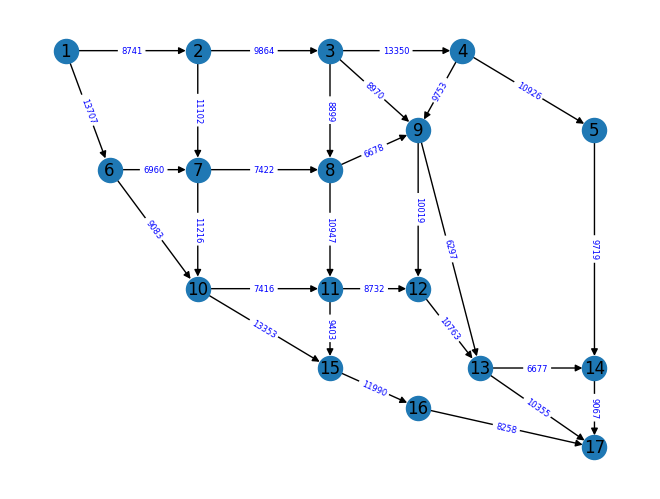


The maximum flow between node 1 and node 17 is: 22448


In [ ]:
nx.draw(G, pos, with_labels=True)

# Draw the capacity labels on edges
capacity_labels = {(u, v): G[u][v]['capacity'] for u, v in G.edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=capacity_labels, font_color='blue', font_size=6)

plt.show()

# Compute the maximum flow
max_flow_value, flow_dict = nx.algorithms.flow.maximum_flow(G, 1, 17)

print("\nThe maximum flow between node 1 and node 17 is:", max_flow_value)
# print("Flow through edges:", flow_dict)

**(c) Given the flow vector in $flow.mat$, compute the external inflow $v$ satisfying $Bf = v$**

Given a multigraph $(V,E)$, an **exogenous network flow** is a vector ${\nu} \in \mathrm{R}^V$ such that

\begin{equation}
	\sum_{i \in V} \nu_i = 0.
\end{equation}

A network flow is a vector $f \in \mathrm{R}^E$ satisfying a positivity constraint and a mass conservation constraints, i.e.,

\begin{equation}
 f \ge \mathbf{0}, \quad Bf = \nu.
\end{equation}

The positive part $ν_i^+ = max\{0, ν_i\}$ has to be interpreted as the exogenous inflow and, to compute it, we use the NetworkX function `np.dot` (equivalently, with the @-product).

In [ ]:
# Compute the external inflow vector v: Bf = v
v = np.dot(B, f)

# Print the resulting external inflow vector
print("External inflow vector v:", v)

External inflow vector v: [ 16282   9094  19448   4957   -746   4768    413     -2  -5671   1169
     -5  -7131   -380  -7412  -7810  -3430 -23544]


**(d) Social optimum flow**

The social optimum flow distribution $f^*$ is defined as the one minimizing the total delay $\sum_{e\in \mathcal{E}} \psi_e(f_e)$, where on every link $e \in \mathcal{E}$, the cost is $\psi_e(f_e) = f_e \tau_e(f_e)$ with $\tau_e(f_e)$ being the delay function.

Our delay function  $\tau_e(f_e)$ is


$\tau_e(f_e) = l_e/(1-f_e/c_e)$, if $0≤f_e<c_e$

For $f_e≥c_e$, the value of $\tau_e(f_e)$ is considered as $+∞$.





Our problem is linear, so we solved it as a convex optimization problem.
Our objective function is:
\begin{equation}
\sum_{e\in \mathcal{E}} f_e\tau_e(f_e) = \sum_{e\in \mathcal{E}} (\frac{l_ec_e}{(1-f_e/c_e)} - l_ec_e ) = \sum_{e\in \mathcal{E}} (\frac{l_ec_e^2}{(c_e-f_e)} - l_ec_e )
\end{equation}
The constraints of all the social optimum flow are always the same:

*   Positivity constraint: $f_e \ge \mathbf{0}$
*   Mass conservation equality constraint: $Bf = \nu$

We used CVXPY library in order to solve the linear problem.
Specifically, we defined an optimization variable with `cp.Variable`(which is a vector with length equal to the number of edges of G). Then, thanks to `cp.Minimize`, we built the minimization problem and `cp.Problem`solved it considering the constraints written above.

In [ ]:
import cvxpy as cp
import warnings
warnings.filterwarnings("ignore")


nu = np.zeros(num_nodes)

# Update new values for nu
nu[0] = v[0]
nu[-1] = -v[0]

# Build the optimization problem
f_d = cp.Variable(G.number_of_edges())
objective = cp.Minimize((l*C*C)@cp.inv_pos(C-f_d) -l@C)
constraints = [B @ f_d == nu, f_d >= 0]
prob = cp.Problem(objective, constraints)

# Solve the problem
result = prob.solve(solver=cp.ECOS)

# Results
opt_flow = f_d.value
print("\nSocial optimal flow:\n", opt_flow)

print("\nOptimal cost:", result)


Social optimal flow:
 [6.45410810e+03 5.91923815e+03 2.99510863e+03 2.99510812e+03
 9.82789190e+03 4.49712192e+03 2.89748872e+03 2.43610352e+03
 3.04722455e+03 5.34869948e+02 1.06978928e-02 2.92411883e+03
 5.09748519e-04 2.99510812e+03 5.33076998e+03 2.73082074e+03
 4.73445239e+03 2.13450314e+03 4.61395896e+02 2.31299831e+03
 3.19221575e+03 5.50521406e+03 2.31068064e+03 8.91562533e-04
 6.24175797e+03 5.30578875e+03 4.73445328e+03 4.73445328e+03]

Optimal cost: 23835.484745725997


**(e) Wardrop equilibrium**

The idea is to model traffic flows in the network resulting not from a centralized optimization, but rather as the outcome of selfish behaviors of users. Such behavior is modeled by assuming that users choose their route so as to minimize the delay they experience along it. This is formalized by the notion of "Wardrop equilibrium".


**Remark**

**Theorem**: $f^{(0)}$ is a Wardrop equilibrium if and only if it is solution of a network flow optimization given that the cost functions $\psi_e(f_e)$ are chosen as

$$
\psi_e(f_e) = \int_0^{f_e} \tau_e(s)~\mathrm{d}s.
$$


To accomplish that we exploit what we have done in the previous point but with a different objective function:
\begin{equation}
\sum_{e\in \mathcal{E}}\int_0^{f_e} \tau_e(s)~\mathrm{d}s = \sum_{e\in \mathcal{E}} (-l_ec_e \ln(c_e-f_e)\ + l_ec_e \ln(c_e)\ )
\end{equation}
The constraints are the same

In [ ]:
# Construct the problem.
f_w = cp.Variable(G.number_of_edges())
objective_w = cp.Minimize(-l * C @ cp.log(C-f_w) + l * C @ cp.log(C))
constraints_w = [B @ f_w == nu, f_w >= 0]
probW=cp.Problem(objective_w, constraints_w)

# The optimal objective value is returned by `prob.solve()`.
result_w = probW.solve()
opt_flow_w = f_w.value

# The optimal value for f is stored in `f.value`.
print("\nWardrop equilibrium:\n", opt_flow_w)
print("\nWardrop Optimum:", result_w)


Wardrop equilibrium:
 [6.53248420e+03 6.53248183e+03 2.20678975e+03 2.20678939e+03
 9.74951569e+03 4.49336593e+03 2.71426169e+03 2.20385709e+03
 3.34278487e+03 2.37067941e-03 1.88855511e+02 4.13683657e+03
 3.56106292e-04 2.20678939e+03 5.25614976e+03 2.24738878e+03
 4.78786759e+03 1.77910661e+03 6.99260109e+02 2.99790915e+03
 2.94664841e+03 5.94455756e+03 2.50793577e+03 4.80176362e-04
 6.77940667e+03 4.71472516e+03 4.78786807e+03 4.78786807e+03]

Wardrop Optimum: 14931.387729529379


**(f) Wardrop equilibrium with tolls**

The idea of marginal tolls is that if a toll equal to $ w_e = f_e^{*} \tau_e'(f_e^{*})$ is added to each link $e$ (where $f^{*}$ denotes the social optimum flow distribution), then selfish users should pay not only for their delay, but also for the cost that make other users pay due to their choice.

Computing the new Wardrop equilibrium $f^{(w)}$ as in e., but with the link delays $\tau_e(f_e)$ replaced by $\tau^{(\omega_e)}_e(f_e) = \tau_e(f_e) + \omega_e$
\begin{equation}
\sum_{e\in \mathcal{E}}\int_0^{f_e} (\tau_e(s) + w_e)~\mathrm{d}s = \sum_{e\in \mathcal{E}} (-l_ec_e \ln(c_e-f_e)\ + l_ec_e \ln(c_e)\ + w_ef_e )
\end{equation}

A CVXPY solution can be obtained by the following code:


In [ ]:
# Compute the new Wardrop Equilibrium including tolls

# compute tau'(f*)
tau_prime = (l * C)/((C - opt_flow_w)**2)

# compute w_e
w_e = opt_flow * tau_prime

# Construct the problem.
f_w_new = cp.Variable(G.number_of_edges())
objective_w_new = cp.Minimize(-l * C @ cp.log(C-f_w_new) + l * C @ cp.log(C) + w_e @ f_w_new)
constraints_w_new = [B @ f_w_new == nu, f_w_new >= 0]
probW_new=cp.Problem(objective_w_new, constraints_w_new)

# The optimal objective value is returned by `prob.solve()`.
result_w_new = probW_new.solve()

# The optimal value for f is stored in `f.value`.
print("\nWardrop equilibrium:\n", f_w_new.value)
print("\nWardrop Optimum:", result_w_new)


Wardrop equilibrium:
 [5.97567749e+03 4.36056641e+03 3.82207707e+03 3.82207679e+03
 1.03063224e+04 4.61845358e+03 3.41215009e+03 3.04901325e+03
 2.52143175e+03 1.61511108e+03 1.04445091e-03 5.38488297e+02
 2.84089255e-04 3.82207679e+03 5.68786881e+03 3.38644543e+03
 5.12283795e+03 2.82141457e+03 3.63137884e+02 1.06607008e+03
 3.74958293e+03 4.81565301e+03 2.76821496e+03 3.84006555e-04
 4.56886980e+03 6.59029175e+03 5.12283833e+03 5.12283833e+03]

Wardrop Optimum: 53840.79300317635


Although the Wardrop equilibrium aims to minimize individual travel time, it is not guaranteed to always lead to the system optimum.

 In some cases, users may choose paths that reduce their individual travel time but result in higher overall congestion in the system.

**(g) Social optimum flow and Wardrop equilibrium with a new cost function $\psi_e(f_e)$**

In this point, we have a new definition of travel time which changes the cost function in:
$\psi_e(f_e) = f_e(\tau_e(f_e)) - l_e)$

First of all, we computed the system optimum $f^*$ for the cost function written above. As we did before, we make use of CVXPY functions to do it.
\begin{equation}
\sum_{e\in \mathcal{E}} f_e(\tau_e(f_e) -l_e) = \sum_{e\in \mathcal{E}} (\frac{l_ec_e}{(1-f_e/c_e)} - l_ec_e - l_ef_e ) = \sum_{e\in \mathcal{E}} (\frac{l_ec_e^2}{(c_e-f_e)} - l_ec_e - l_ef_e )
\end{equation}


In [ ]:
f_t = cp.Variable(G.number_of_edges())
objective_t = cp.Minimize((l*C*C)@cp.inv_pos(C-f_t) - l@C - l@f_t)
constraints_t = [B @ f_t == nu, f_t >= 0]
prob_t = cp.Problem(objective_t, constraints_t)

result_t = prob_t.solve()
opt_flow_t = f_t.value

# Results
print("\nSocial optimal flow:\n", opt_flow_t)
print("\nOptimal cost:", result_t)


Social optimal flow:
 [6.46810513e+03 5.61798382e+03 3.29758581e+03 3.29758551e+03
 9.81389487e+03 4.50159021e+03 3.00281863e+03 2.56413748e+03
 2.91779019e+03 8.50121309e+02 1.48810781e-03 2.32039652e+03
 2.96213124e-04 3.29758551e+03 5.31230467e+03 2.93146731e+03
 4.72973025e+03 2.34889289e+03 4.38682632e+02 1.96674410e+03
 3.37014959e+03 5.33689369e+03 2.14298855e+03 3.46968673e-04
 6.11169534e+03 5.44057406e+03 4.72973060e+03 4.72973060e+03]

Optimal cost: 13334.304858714098



To construct a toll vector $w*$, such that the Wadrop Equilibrium $f^{(w^*)}_g$ coincides with $f^*_g$, we decided to choose $w^*$ as:

$w^* =\psi'(f^*_g) - \tau(f^*_g)$

$\psi'(f^*_g) = (l_e f^*_g \frac{2C-f^*_g}{(C - f^*_g)^2})$

$\tau(f^*_g) = \frac{l_ec_e}{c_e -f^*_g}$


To be sure of our results, we computed the new Wardrop Equilibrium with the constructed tolls $f^{(w^*)}$

In [ ]:
# psi_prime and tau computed in opt_flow
psi_prime = (l * opt_flow_t * (2 * C - opt_flow_t))/((C - opt_flow_t)**2)
tau_t = l/(1 - (opt_flow_t/C))
w_star = psi_prime - tau_t

f_w_star = cp.Variable(G.number_of_edges())
objective_w_star = cp.Minimize(-l * C @ cp.log(C-f_w_star) + l * C @ cp.log(C) + w_star @ f_w_star)
constraints_w_star = [B @ f_w_star == nu, f_w_star >= 0]
probW_star=cp.Problem(objective_w_star, constraints_w_star)

result_w_star = probW_star.solve()

# Results
print("\nWardrop equilibrium:\n", f_w_star.value)
print("\nWardrop Optimum:", result_w_star)


Wardrop equilibrium:
 [6.46799938e+03 5.61798172e+03 3.29747692e+03 3.29747477e+03
 9.81400051e+03 4.50158885e+03 3.00279056e+03 2.56412874e+03
 2.91793673e+03 8.50017667e+02 3.43193208e-03 2.32050136e+03
 2.15235765e-03 3.29747477e+03 5.31241167e+03 2.93151855e+03
 4.72970907e+03 2.34881595e+03 4.38665254e+02 1.96669553e+03
 3.37018303e+03 5.33687856e+03 2.14289129e+03 7.75142086e-04
 6.11192399e+03 5.44036606e+03 4.72970984e+03 4.72970984e+03]

Wardrop Optimum: 42023.35514124677
